In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Excel File / Dataset

In [2]:
# load the data sets
dataset = pd.read_excel('Superstore_USA.xlsx')

In [3]:
# check the top 5 rows
dataset.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [4]:
# check the shape
dataset.shape

(9426, 24)

In [5]:
# check the info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

# Missing value analysis

In [6]:
# check for missing values
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [8]:
dataset['Order Year']=dataset['Order Date'].dt.year

In [9]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace = True)

# Data visualizaion


In [10]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [11]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [12]:
dataset["Order Priority"] = dataset["Order Priority"].replace("Critical ", "Critical")

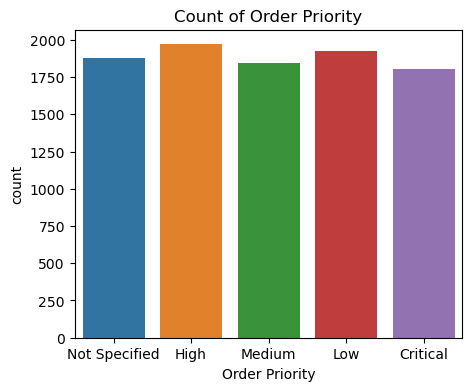

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(x ="Order Priority", data=dataset)
plt.title("Count of Order Priority")
plt.show()

This count plot shows the distribution of different order priorities in the dataset. It provides insights into the frequency of each order priority category.


In [14]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [15]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

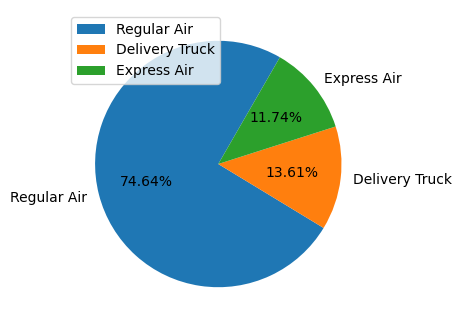

In [16]:
plt.figure(figsize=(5,4))
plt.pie(y,labels = x, startangle = 60, autopct="%0.2f%%")
plt.legend(loc = 2)
plt.show()

This pie chart depicts the distribution of different ship modes in the dataset. It helps understand the relative proportions of each ship mode used for product delivery.

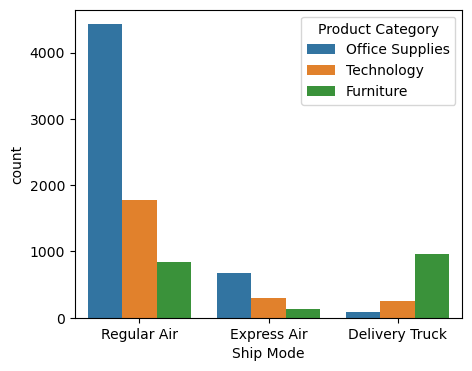

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(x = "Ship Mode", data = dataset, hue= "Product Category")
plt.show()

This count plot displays the count of different ship modes used for each product category. It provides insights into the preferred shipping methods for different types of products.

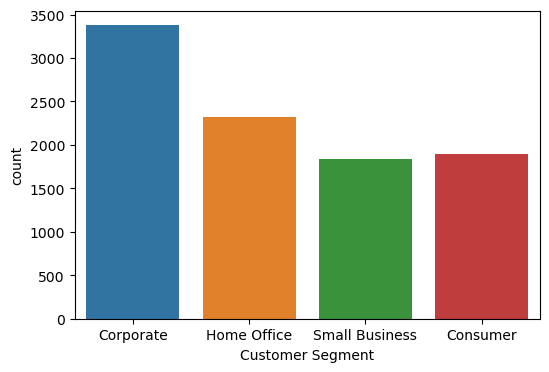

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x = "Customer Segment", data = dataset)   
plt.show()

This count plot shows the distribution of different customer segments in the dataset. It helps understand the relative size and importance of each customer segment.


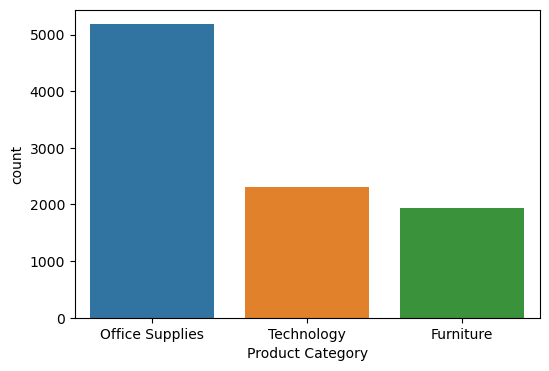

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x = "Product Category", data = dataset)   
plt.show()

This count plot displays the count of products in each product category. It provides insights into the relative popularity and sales volume of different product categories.


In [20]:
dataset["Product Category"].info

<bound method Series.info of 0       Office Supplies
1       Office Supplies
2       Office Supplies
3       Office Supplies
4            Technology
             ...       
9421    Office Supplies
9422    Office Supplies
9423          Furniture
9424          Furniture
9425    Office Supplies
Name: Product Category, Length: 9426, dtype: object>

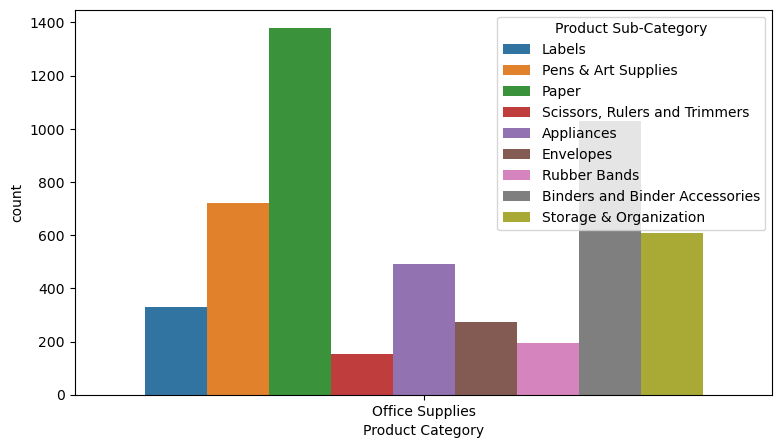

In [21]:
plt.figure(figsize=(9,5))
sns.countplot(x = "Product Category", data = dataset[dataset["Product Category"]=="Office Supplies"], hue="Product Sub-Category")
plt.show()

This count plot shows the distribution of product sub-categories within the Office Supplies category. It helps identify the most popular sub-categories within the Office Supplies segment.


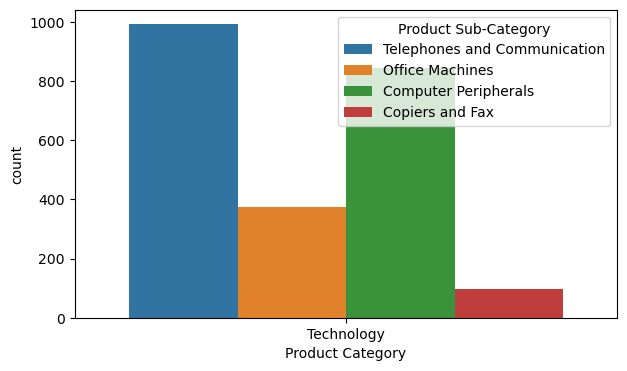

In [22]:
plt.figure(figsize=(7,4))
sns.countplot(x = "Product Category", data = dataset[dataset["Product Category"]=="Technology"], hue="Product Sub-Category")   
plt.show()

This count plot displays the distribution of product sub-categories within the Technology category. It provides insights into the relative popularity of different sub-categories within the Technology segment.


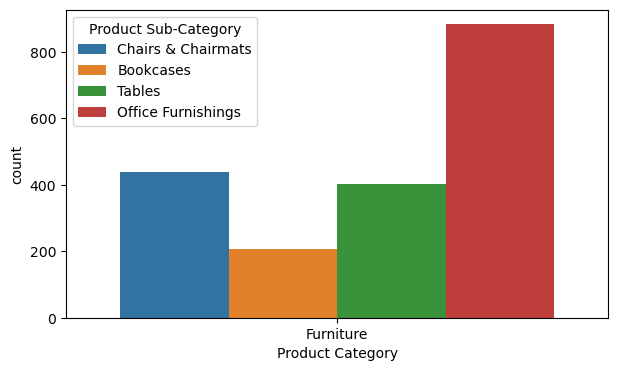

In [23]:
plt.figure(figsize=(7,4))
sns.countplot(x = "Product Category", data = dataset[dataset["Product Category"]=="Furniture"], hue="Product Sub-Category")   
plt.show()

This count plot shows the distribution of product sub-categories within the Furniture category. It helps identify the most popular sub-categories within the Furniture segment.

In [24]:
dataset['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

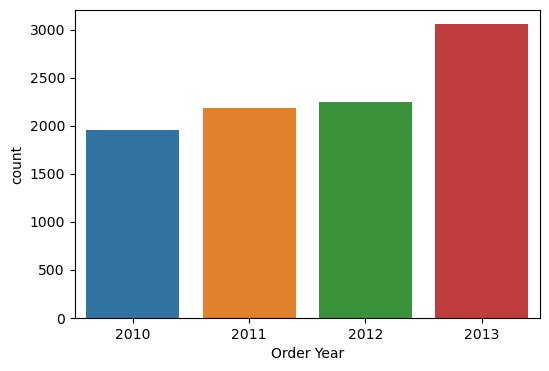

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x = "Order Year", data = dataset)   
plt.show()

This count plot displays the count of orders placed in each year. It provides insights into the trend and growth of orders over time.


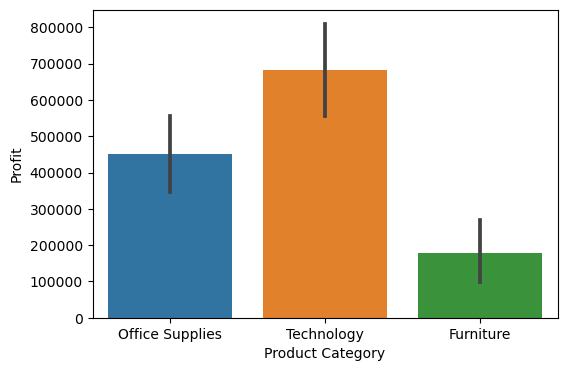

In [26]:
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category", y ="Profit", data= dataset, estimator='sum')
plt.show()

This bar plot shows the total profit earned for each product category. It helps identify the most profitable product categories and their relative contributions to overall profitability.


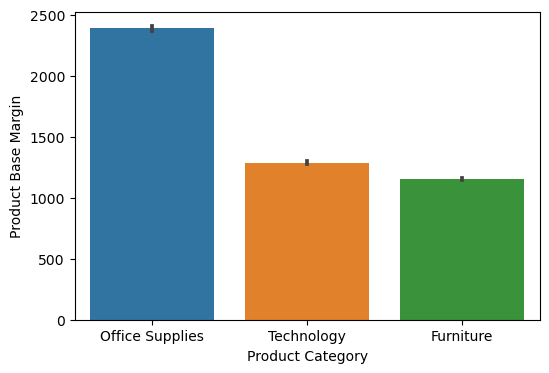

In [27]:
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category", y ="Product Base Margin", data= dataset, estimator='sum')
plt.show()

This bar plot displays the total product base margin for each product category. It provides insights into the relative profit margins of different product categories.


In [28]:
##count of State wise Sale
x = dataset['State or Province'].value_counts().head().index
print(x)

Index(['California', 'Texas', 'Illinois', 'New York', 'Florida'], dtype='object', name='State or Province')


In [29]:
y=dataset['State or Province'].value_counts().head().values
print(y)

[1021  646  584  574  522]


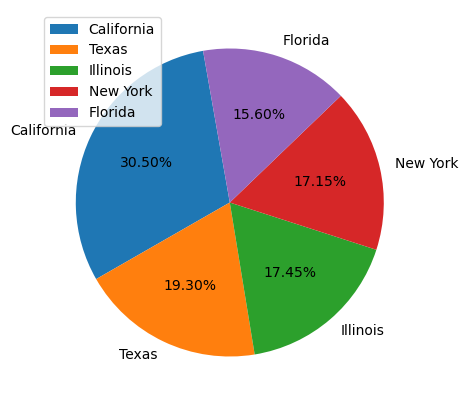

In [30]:
plt.figure(figsize=(10,5))
plt.pie(y,labels=x,startangle=100,autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()

This pie chart shows the distribution of sales across different states or provinces. It helps identify the states with the highest sales contributions and their relative proportions.
